# Data Storytelling with Titanic Dataset #

For those outside of the data science community, the concept of predicting survivors of the <i>Titanic</i> shipwreck might sound cool, if not an on-ramp into understanding how data science works with a famous situation. By contrast, this dataset gets a bad rap within the data science community, perhaps because it is so often utilized as a "first project". As a classical musician by training, I'm accustomed to revisiting data that thousands have examined before, so let's dive in!

In [1]:
#Import packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#Load training data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('train.csv')
df = df_train.append(df_test)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


I always like to start my analysis with 3 steps:
<ol>
    <li>The describe() method;</li>
    <li>Exploring the data types using the .dtypes attribute; and</li>
    <li>Examining the distribution of numerical variables.</li>
   
</ol>

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1782.000000,1782.000000,1782.000000,1428.000000,1782.000000,1782.000000,1782.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.281582,0.486456,0.835836,14.521407,1.102434,0.805831,49.679476
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.250000,0.000000,2.000000,20.000000,0.000000,0.000000,7.903100
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.750000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Let's start a tally of issues we'll need to address:
<ul>
    <li>
        <b>Issue 1:</b> Resolve NaN values in 'Age' column.
    </li>

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

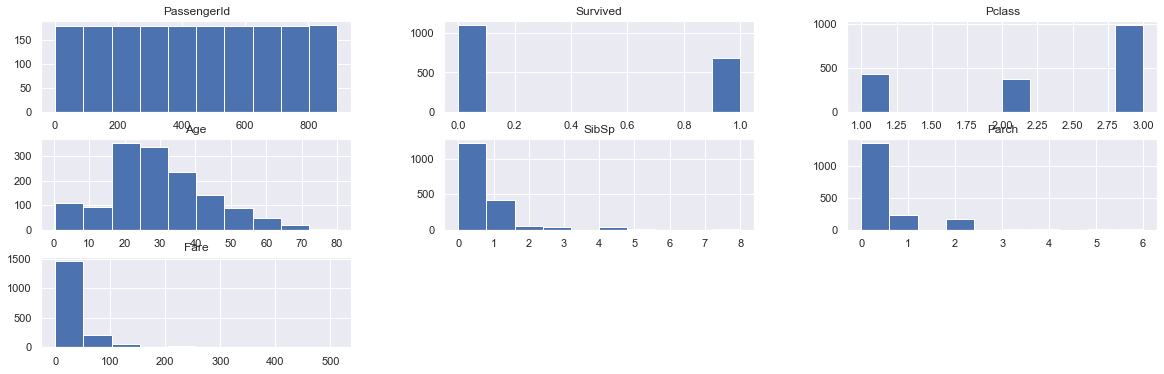

In [4]:
df.hist(figsize=(20,6))

Let's add one more item to the tally:
<ul>
    <li><b>Issue 1:</b> Resolve NaN values in 'Age' column.</li>
    <li><b>Issue 2:</b> Address outliers in Fare column.</li>

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

And one more item:
<ul>
    <li><b>Issue 1:</b> Resolve NaN values in 'Age' column.</li>
    <li><b>Issue 2:</b> Address outliers in Fare column.</li>
    <li><b>Issue 3:</b> Assign categorical variables to Sex and Embarked columns.</li>

Let's get to cleaning up our data!

In [6]:
df.Fare.sort_values(ascending=False)

258    512.3292
679    512.3292
737    512.3292
258    512.3292
737    512.3292
         ...   
815      0.0000
806      0.0000
597      0.0000
732      0.0000
271      0.0000
Name: Fare, Length: 1782, dtype: float64

In [7]:
df.Fare.quantile(.97)

151.55

In [8]:
#Drop descriptive features
df = df.drop(['Name', 'Ticket','Cabin','PassengerId'], axis=1)

In [9]:
#Impute missing Age values with mean
df.Age = df.Age.fillna(df.Age.mean())

In [10]:
#Perform listwise deletion of top 3% of fares paid
df = df[df.Fare < df.Fare.quantile(.97)]

In [11]:
#Assign categorical variables
df.Sex = df.Sex.astype('category')
df.Embarked = df.Embarked.astype('category')

In [12]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000
mean,0.373550,2.352668,29.674705,0.518561,0.357309,25.187306
std,0.483887,0.813973,12.959523,1.105677,0.787267,26.364434
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,13.500000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,29.125000
max,1.000000,3.000000,80.000000,8.000000,6.000000,146.520800


array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

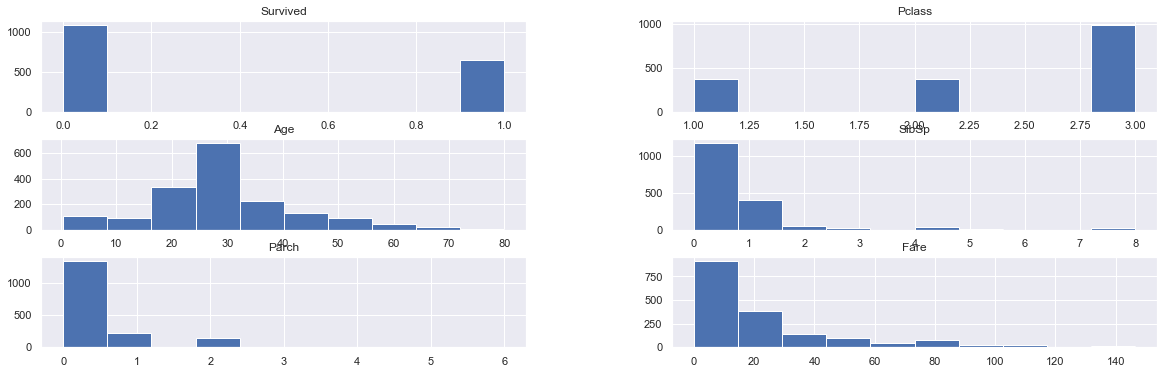

In [13]:
df.hist(figsize=(20,6))

What's this cleaner dataset tell us?
<ol>
    <li>We have a bunch of single travelers.</li>
    <li>Those traveling as a family vary greatly in size.</li>
    <li>The distribution of fares generally ranges from 0-125.</li>
    <li>The age of traveler is an approximately normal distribution.</li>
    
</ol>
Let's engineer the Parch and SibSp columns to look at those traveling alone versus those traveling as a group, rather than providing a literal count of every child, spouse, or parent.

In [14]:
df.Parch = df.Parch.apply(lambda x: 1 if x > 0 else 0)

In [15]:
df.SibSp = df.SibSp.apply(lambda x: 1 if x > 0 else 0)

In [16]:
df = pd.get_dummies(df)

In [17]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.325826,-0.076845,0.120721,0.140869,0.304746,0.534782,-0.534782,0.160248,0.010398,-0.151952
Pclass,-0.325826,1.000000,-0.349614,-0.073396,0.025884,-0.656498,-0.105279,0.105279,-0.229645,0.214156,0.070038
Age,-0.076845,-0.349614,1.000000,-0.139989,-0.275875,0.145432,-0.089265,0.089265,0.030592,-0.013561,-0.025937
SibSp,0.120721,-0.073396,-0.139989,1.000000,0.423101,0.359753,0.204740,-0.204740,0.043928,-0.055112,0.000858
Parch,0.140869,0.025884,-0.275875,0.423101,1.000000,0.226617,0.243608,-0.243608,0.028074,-0.090865,0.036734
Fare,0.304746,-0.656498,0.145432,0.359753,0.226617,1.000000,0.215031,-0.215031,0.281778,-0.141539,-0.163796
Sex_female,0.534782,-0.105279,-0.089265,0.204740,0.243608,0.215031,1.000000,-1.000000,0.080102,0.082715,-0.129455
Sex_male,-0.534782,0.105279,0.089265,-0.204740,-0.243608,-0.215031,-1.000000,1.000000,-0.080102,-0.082715,0.129455
Embarked_C,0.160248,-0.229645,0.030592,0.043928,0.028074,0.281778,0.080102,-0.080102,1.000000,-0.147221,-0.767821
Embarked_Q,0.010398,0.214156,-0.013561,-0.055112,-0.090865,-0.141539,0.082715,-0.082715,-0.147221,1.000000,-0.511576


### Findings ###

This correlation matrix shows how much gender, traveling class (note that high class numbers represent more expensive tickets), and price influenced one's likelihood of surviving the <i>Titanic</i> shipwreck. There's also an interesting relationship with the Cherbourg port and families traveling aboard the <i>Titanic</i>. If the data about the median income or demographics around each port were available, or other information that influenced what types of customers boarded at each port, we might have an explanation for why departure point significantly affected one's odds of survival.

### Quick Model ###

We may as well create a quick logistic regression model to see if we can reasonably predict one's likelihood of survival. Perhaps just as importantly, 

In [18]:
X = df.drop('Survived', axis=1)
y = df.Survived
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)

In [21]:
clf.score(X_test_scaled,y_test)

0.7926186291739895

In [32]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test_scaled)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('True Negative: ' + str(tn) + ' False Positive: ' + str(fp) + ' False Negative: ' + str(fn) + ' True Positive: ' + str(tp))

True Negative: 309 False Positive: 52 False Negative: 66 True Positive: 142


In [34]:
features = pd.DataFrame(clf.coef_, columns=list(df.columns)[1:]).transpose()
features = features.rename(columns={0:'Coefficient'}).sort_values(by='Coefficient', ascending=False)
features

,Coefficient
Sex_female,0.625738
Parch,0.017034
Fare,-0.003067
SibSp,-0.040098
Embarked_C,-0.083520
Embarked_Q,-0.090308
Embarked_S,-0.363164
Age,-0.549834
Sex_male,-0.625738
Pclass,-0.981560
